## ANALYZING TRAFFIC DATA ON THE I-94 HIGHWAY

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Preprocessing**](#3)
4. [**Exploratory Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

## Introduction

![](https://s3.amazonaws.com/dq-content/524/i94_figma.png)

### Project Description

**Goal/Purpose:** 

Interstate 94 (I-94) is a 2,551.13-kilometer-long east-west Interstate Highway in the Midwestern United States that connects the Great Lakes and northern Great Plains regions.

The purpose of this study is to identify a few signs of excessive traffic on I-94.

The findings would be useful in assisting with traffic flow planning in the region. 


<p>&nbsp;</p>

**Questions to be Answered:**

- What type of weather is related with excessive traffic on I-94?
- Which day is known for heavy traffic on I-94?
- What time of day is connected with heavy traffic on Interstate 94?


<p>&nbsp;</p>



### Data Description

**Content:** 

This dataset is a CSV file with 48,204 data points that covers hourly Interstate-94 **westbound traffic** (vehicle going from east to west) volume for a station (MN DoT ATR station 301), approximately halfway between Minneapolis and St Paul. Hourly weather forecasts and holidays are added to investigate the effects on traffic volume.


<p>&nbsp;</p>

**Description of Attributes:** 
- `holiday` (Categorical): US National holidays plus regional holiday, Minnesota State Fair
- `temp` (Numeric): Average temp in Kelvin
- `rain_1h` (Numeric): Amount in mm of rain that occurred in the hour
- `snow_1h` (Numeric): Amount in mm of snow that occurred in the hour
- `clouds_all` (Numeric): Percentage of cloud cover
- `weather_main` (Categorical): Short textual description of the current weather
- `weather_description` (Categorical): Longer textual description of the current weather
- `date_time` (DateTime): Hour of the data collected in local CST time
- `traffic_volume` (Numeric): Hourly I-94 ATR 301 reported westbound traffic volume 

<p>&nbsp;</p>

**Acknowledgements:** 

The original dataset was collected by John Hogue and the original source can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

Credit to Chris Chua for sharing a notebook template [@chuawt](https://chuawt.github.io) 


---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [1]:
# Ignore warnings if needed
# import warnings
# warnings.filterwarnings('ignore')

# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (10, 5)   
# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

### Loading Data

In [2]:
# Load DataFrame
file ='Metro_Interstate_Traffic_Volume.csv'
df = pd.read_csv(file)

### Basic Data Exploration

#### Number of Rows and Columns

In [3]:
# Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

Rows count: 48204
Columns count: 9


#### Display First and Last Rows

In [4]:
# Look at first 5 rows
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.280,0.000,0.000,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.360,0.000,0.000,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.580,0.000,0.000,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.130,0.000,0.000,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.140,0.000,0.000,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
# Look at last 5 rows
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.450,0.000,0.000,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.760,0.000,0.000,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.730,0.000,0.000,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.090,0.000,0.000,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.120,0.000,0.000,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


#### Check Data Types

In [6]:
# Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


- `holiday`, `weather_main`, `weather_description`, `date_time` are **strings**.
- `temp`, `rain_1h`, `snow_1h` are **floats**.
- `clouds_all` is an **integer**.

`date_time` should be a **datetime** type instead.

#### Check Missing Data

In [7]:
# Print percentage of missing values
missing_percent = df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print(None)

---- Percentage of Missing Values (%) -----
None


#### Check for Duplicate Rows

In [8]:
# Show duplicated `date_time`` including first occurrence
df[df.duplicated(subset=['date_time'], keep=False)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
178,None,281.250,0.000,0.000,99,Rain,light rain,2012-10-10 07:00:00,6793
179,None,281.250,0.000,0.000,99,Drizzle,light intensity drizzle,2012-10-10 07:00:00,6793
180,None,280.100,0.000,0.000,99,Rain,light rain,2012-10-10 08:00:00,6283
181,None,280.100,0.000,0.000,99,Drizzle,light intensity drizzle,2012-10-10 08:00:00,6283
182,None,279.610,0.000,0.000,99,Rain,light rain,2012-10-10 09:00:00,5680
...,...,...,...,...,...,...,...,...,...
48173,None,280.680,0.000,0.000,90,Clouds,overcast clouds,2018-09-29 19:00:00,3818
48192,None,283.480,0.000,0.000,90,Rain,light rain,2018-09-30 14:00:00,4380
48193,None,283.480,0.000,0.000,90,Drizzle,light intensity drizzle,2018-09-30 14:00:00,4380
48194,None,283.840,0.000,0.000,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302


Out of 48,204 rows, a whopping 13,074 rows have duplicated `date_time`. 
For example, **2012-10-10 07:00:00** has two rows with all attributes the same except for `weather_main` and `weather_description`. 

It is therefore assumed that if there are multiple weather conditions, each of the condition will be listed as a different row, such as "Rain" and "Drizzle" for `weather_main`. 

In [9]:
# Show number of duplicated rows
print(f"No. of entirely duplicated rows: {df.duplicated().sum()}")

# Show duplicated rows
df[df.duplicated()]

No. of entirely duplicated rows: 17


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18697,None,286.290,0.000,0.000,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23851,None,289.060,0.000,0.000,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26784,None,289.775,0.000,0.000,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26980,None,287.860,0.000,0.000,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27171,None,279.287,0.000,0.000,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
28879,None,267.890,0.000,0.000,90,Snow,light snow,2016-12-06 18:00:00,4520
29268,None,254.220,0.000,0.000,1,Clear,sky is clear,2016-12-19 00:00:00,420
34711,None,295.010,0.000,0.000,40,Clouds,scattered clouds,2017-06-21 11:00:00,4808
34967,None,292.840,0.000,0.000,1,Clear,sky is clear,2017-06-30 10:00:00,4638
34969,None,294.520,0.000,0.000,1,Clear,sky is clear,2017-06-30 11:00:00,4725


On a closer look, there are several times where the readings are duplicated entirely (i.e. the entire row is a duplicate). This should definitely be fixed so as not to double-count certain rows.

#### Check Uniqueness of Data

In [10]:
# Print the number of unique values
num_unique = df.nunique().sort_values()
print('---- Number of Unique Values -----')
print(num_unique)

---- Number of Unique Values -----
weather_main              11
holiday                   12
snow_1h                   12
weather_description       38
clouds_all                60
rain_1h                  372
temp                    5843
traffic_volume          6704
date_time              40575
dtype: int64


#### Check Data Range

In [11]:
# Print summary statistics
df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,"48,204.000","48,204.000","48,204.000","48,204.000",48204,48204,48204,"48,204.000"
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.206,0.334,0.000,49.362,NaN,NaN,NaN,"3,259.818"
std,NaN,13.338,44.789,0.008,39.016,NaN,NaN,NaN,"1,986.861"
min,NaN,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0.000
25%,NaN,272.160,0.000,0.000,1.000,NaN,NaN,NaN,"1,193.000"
50%,NaN,282.450,0.000,0.000,64.000,NaN,NaN,NaN,"3,380.000"
75%,NaN,291.806,0.000,0.000,90.000,NaN,NaN,NaN,"4,933.000"


### Areas to Fix
- **Data Types**: `date_time` should be datetime type. 
- **Missing Data**: No missing values.
- **Duplicate Rows**: There are 34 entirely duplicated rows.
- **Uniqueness of Data**: No redundant columns.
- **Data Range**:
    - `temp` has a minimum value of 0 Kelvin (absolute zero[<sup id="fn1-back">[1]</sup>](#fn1)), which is impossible as a weather condition.
    - `rain_1h` has a maximum value of 9,831.30 mm while the world record[<sup id="fn2-back">[2]</sup>](#fn2) is 305 mm.

---

# 3

## Data Preprocessing

### Rename Columns

In [12]:
# Rename columns
columns_to_rename = {'temp': 'temp_k',
                     'rain_1h': 'rain_1h_mm',
                     'snow_1h': 'snow_1h_mm'}
df.rename(columns=columns_to_rename, inplace=True)

In [13]:
# Verify columns are renamed
df.columns

Index(['holiday', 'temp_k', 'rain_1h_mm', 'snow_1h_mm', 'clouds_all',
       'weather_main', 'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

### Drop Redundant Columns

We check the percentage frequency of the most common value for each column to see if there are any redundant columns to be excluded from the analysis.

In [14]:
# Check the proportion of the most frequent value in each column
print('---- Frequency of the Mode (%) -----')
mode_dict = {col: (df[col].value_counts().iat[0] / df[col].size * 100) for col in df.columns}
mode_series = pd.Series(mode_dict)
mode_series

---- Frequency of the Mode (%) -----


holiday               99.873
temp_k                 0.266
rain_1h_mm            92.808
snow_1h_mm            99.869
clouds_all            34.109
weather_main          31.458
weather_description   24.199
date_time              0.012
traffic_volume         0.104
dtype: float64

In [15]:
# Show the value frequency of each column greater than the mode's threshold
threshold = 80
for col in mode_series[mode_series > threshold].index:
    print(df[col].value_counts(dropna=False).head())
    print()

None                48143
Labor Day               7
Thanksgiving Day        6
Christmas Day           6
New Years Day           6
Name: holiday, dtype: int64

0.000    44737
0.250      948
0.510      256
1.020      123
0.300      121
Name: rain_1h_mm, dtype: int64

0.000    48141
0.050       14
0.060       12
0.510        6
0.250        6
Name: snow_1h_mm, dtype: int64



Although these three columns below have predominant most common value, they do not need to be excluded from the analysis as the most common value for these columns are too be expected.
- `holiday`: most of the days are normal days (not a holiday) which is to be expected.
- `rain_1h_mm`: most of the days have no rain.
- `snow_1h_mm`: most of the days have no snow.

### Changing Data Types

Then we convert the `date_time` column to **datetime** data type.

In [16]:
# Convert column to the right data type
df['date_time'] = pd.to_datetime(df['date_time'], infer_datetime_format=True)

In [17]:
# Verify conversion
assert ptypes.is_datetime64_any_dtype(df['date_time'])

### Handling Unreasonable Data Ranges

Next, we dropped the rows containing temperatures of 0 Kelvin or rainfall in an hour exceeding the world record.

In [18]:
# Check percentage of rows to be dropped
print('----- Percentage (%) of values to be dropped -----')
print(f"temp_k: {(df['temp_k'] == 0).mean():.2%}")
print(f"rain_1h_mm: {(df['rain_1h_mm'] > 305).mean():.2%}")

----- Percentage (%) of values to be dropped -----
temp_k: 0.02%
rain_1h_mm: 0.00%


We can go ahead to drop the affected rows as the percentage of rows to be dropped is insignificant.

In [19]:
# Drop affected rows
df = df.loc[~((df['temp_k'] == 0) | (df['rain_1h_mm'] > 305))].reset_index()

In [20]:
# Verify rows dropped
len(df)

48193

### Dropping Duplicates

We should drop any rows which are entirely the same, for weather related analysis.

At the same time, we also create a new DataFrame (`df_unique`) that only has unique `date_time` values when doing non-weather related analysis.

In [21]:
# Drop entirely duplicated rows
df.drop_duplicates(inplace=True, ignore_index=True)

In [22]:
# Verify rows dropped
assert df.duplicated().sum()==0

In [23]:
# Also create a new DataFrame with unique `date_time`
df_unique = df.drop_duplicates(subset=['date_time']).copy()

### Features Engineering

With the `date_time` column, we can also add an additional column to define **daytime** (7AM-7PM) and **nighttime** (7PM-7AM).

In [24]:
# Add `daynight` column
df['daynight'] = df['date_time'].apply(lambda x: 'day' if 7 <= x.hour < 19 else 'night')
df_unique['daynight'] = df['date_time'].apply(lambda x: 'day' if 7 <= x.hour < 19 else 'night')

We can also add an additional column to extract the **month** from the `date_time` column.

In [25]:
# Add `month` column
df['month'] = df['date_time'].dt.month
df_unique['month'] = df_unique['date_time'].dt.month

Next, we add the `dayofweek` column.

In [26]:
# Add `dayofweek` column
df['dayofweek'] = df['date_time'].dt.dayofweek
df_unique['dayofweek'] = df_unique['date_time'].dt.dayofweek # 0 is Monday, 6 is Sunday

Also, we can extract the `hour` from the `date_time` column.

In [27]:
# Add `hour` column
df['hour'] = df['date_time'].dt.hour
df_unique['hour'] = df_unique['date_time'].dt.hour

---

# 4

## Exploratory Data Analysis

Here is where your analysis begins. You can add different sections based on your project goals.

### Exploring `traffic_volume`

Text(0.5, 1.0, 'Frequency Plot for Traffic Volume')

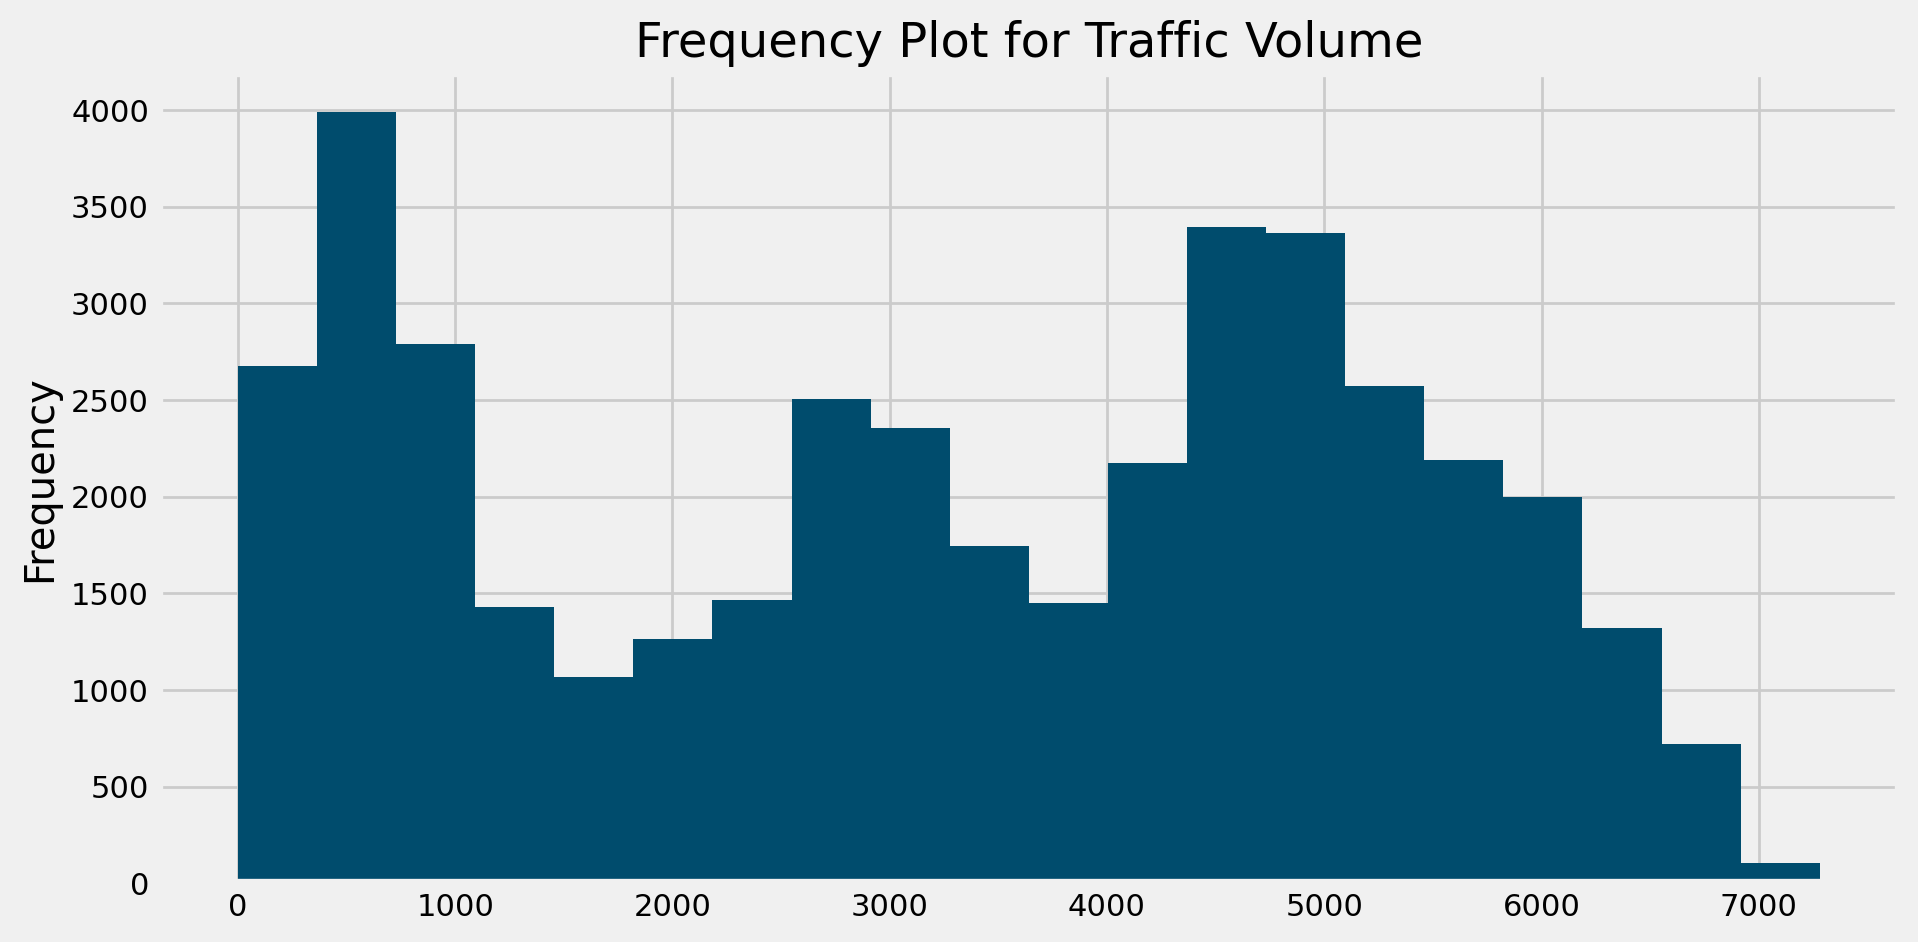

In [28]:
# Plot histogram
df_unique['traffic_volume'].plot.hist(bins=20, color=custom_hue)
plt.title('Frequency Plot for Traffic Volume')

In [29]:
# Show summary statistics
df_unique['traffic_volume'].describe()

count   40,564.000
mean     3,291.081
std      1,984.639
min          0.000
25%      1,249.750
50%      3,429.000
75%      4,952.000
max      7,280.000
Name: traffic_volume, dtype: float64

About 25% of the time, there were 1,250 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

And about 25% of the time, the traffic volume was four times as much (4,952 cars or more).

Let's see if the day and night time affect the traffic volume changes.

### Exploring `traffic_volume` by **day** or **night** time

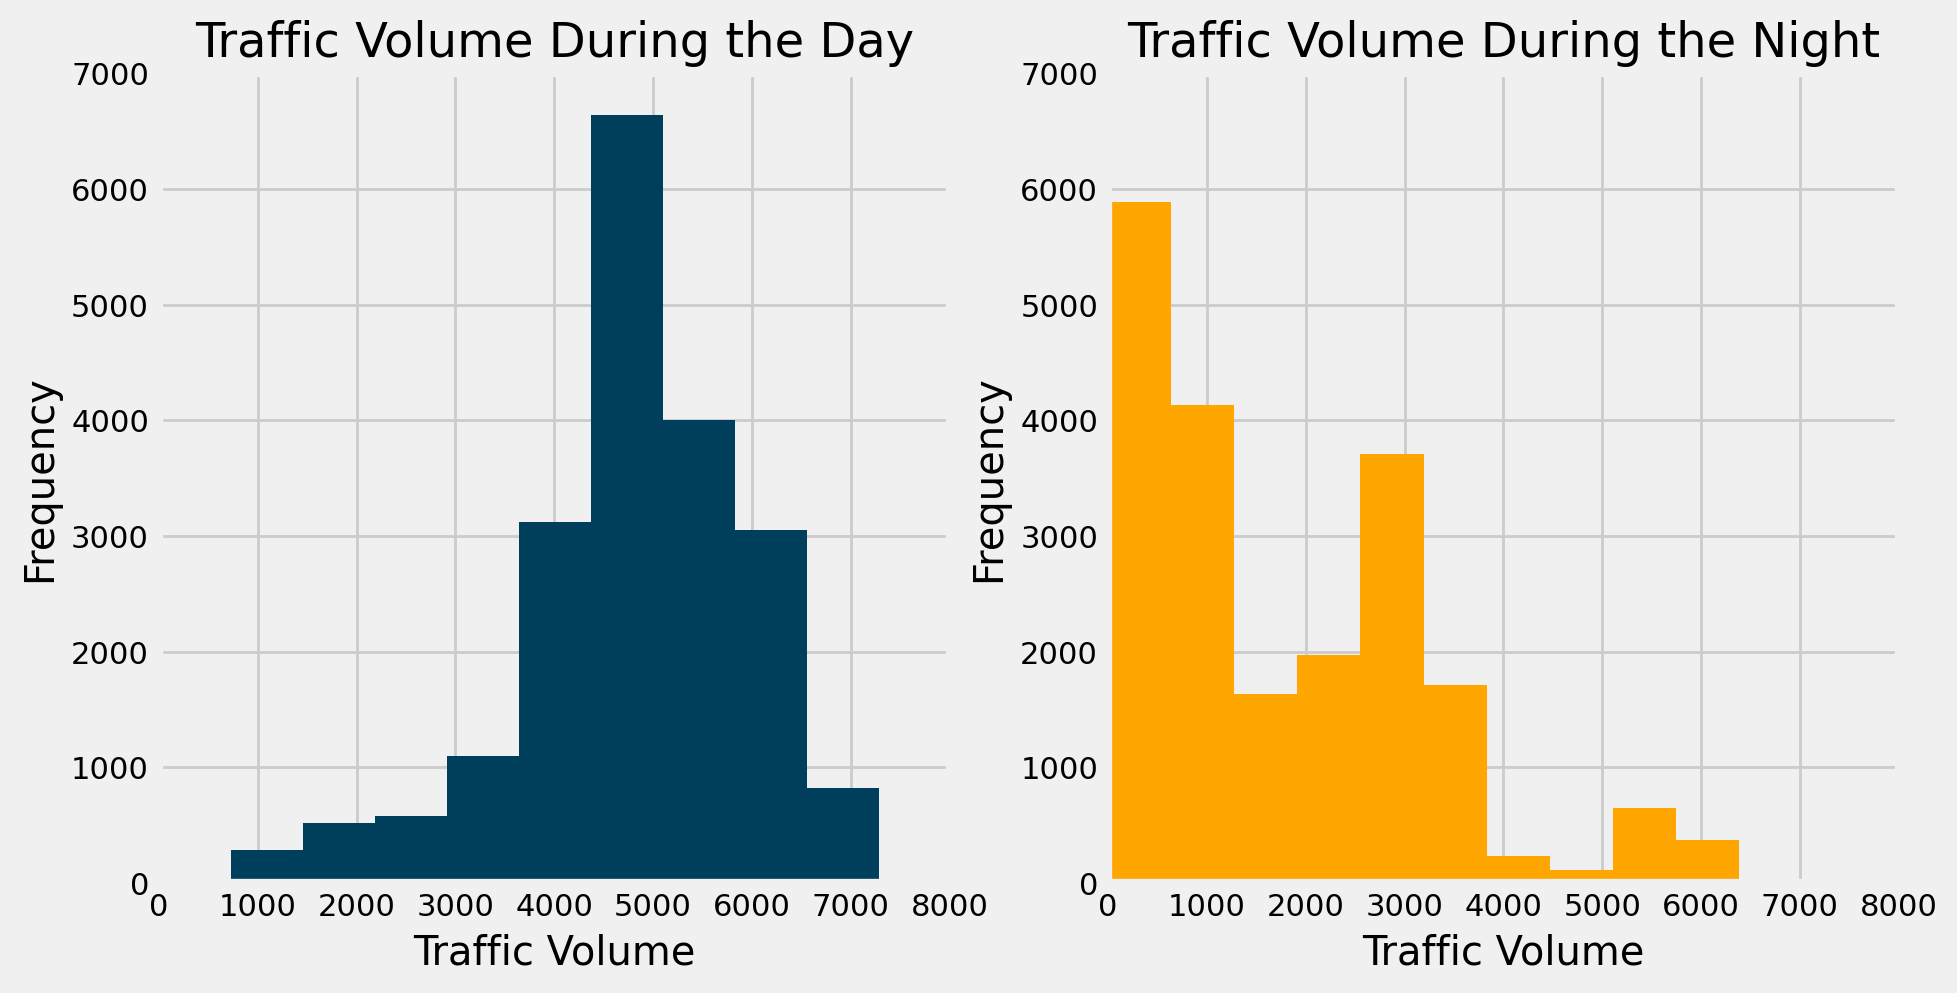

In [30]:
# Plot 2 histograms side by side
fig, axs = plt.subplots(1, 2)

unique_day = df_unique[df_unique['daynight'] == 'day']
axs[0].hist(unique_day['traffic_volume'], bins=10, color=custom_palette[0])
axs[0].set_title('Traffic Volume During the Day')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Traffic Volume')
axs[0].set_ylim(0, 7000)
axs[0].set_xlim(0, 8000)

unique_night = df_unique[df_unique['daynight'] == 'night']
axs[1].hist(unique_night['traffic_volume'], bins=10, color=custom_palette[-1])
axs[1].set_title('Traffic Volume During the Night')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Traffic Volume')
axs[1].set_ylim(0, 7000)
axs[1].set_xlim(0, 8000)

plt.show()

In [31]:
# Show the summary statistics of day and night data
day_night_stats = pd.concat([unique_day['traffic_volume'].describe(), unique_night['traffic_volume'].describe()], axis=1)
day_night_stats.columns = ['day', 'night']
day_night_stats

,day,night
count,"20,147.000","20,417.000"
mean,"4,795.699","1,806.361"
std,"1,154.838","1,439.140"
min,0.000,0.000
25%,"4,287.000",542.000
50%,"4,843.000","1,341.000"
75%,"5,584.000","2,841.000"
max,"7,280.000","6,386.000"


**Observations**
- The traffic is usually heavy during the day (7 am to 7 pm) and usually light during the night (7 pm to 7 am).

Since our goal is to find indicators of heavy traffic, we can drop the nighttime traffic as the traffic is generally light at night. 

In [32]:
# Create a new DataFrame to only include daytime data.
day = df.loc[df['daynight'] == 'day']
day_unique = df_unique.loc[df_unique['daynight'] == 'day']

### Exploring **day traffic volume** by `month`

In [33]:
# Check frequency of `month`
print('----- Frequency (%) of Month -----')
print(round(day_unique['month'].value_counts(normalize=True).sort_index() * 100, 2))

----- Frequency (%) of Month -----
1     8.030
2     7.630
3     8.110
4     8.390
5     8.900
6     8.000
7    10.610
8     9.210
9     7.890
10    7.380
11    7.690
12    8.170
Name: month, dtype: float64


The frequency of each month is not the same.

However, we can calculate the mean traffic volume for each month.

In [34]:
# Group by the month
by_month = day_unique.groupby('month').mean(numeric_only=True)

# Display traffic volume by month
print('----- Mean Traffic Volume by Month -----')
print(by_month['traffic_volume'])

----- Mean Traffic Volume by Month -----
month
1    4,499.588
2    4,765.255
3    4,943.923
4    4,972.463
5    4,914.630
6    4,929.326
7    4,616.204
8    4,943.619
9    4,860.859
10   4,937.358
11   4,734.512
12   4,458.936
Name: traffic_volume, dtype: float64


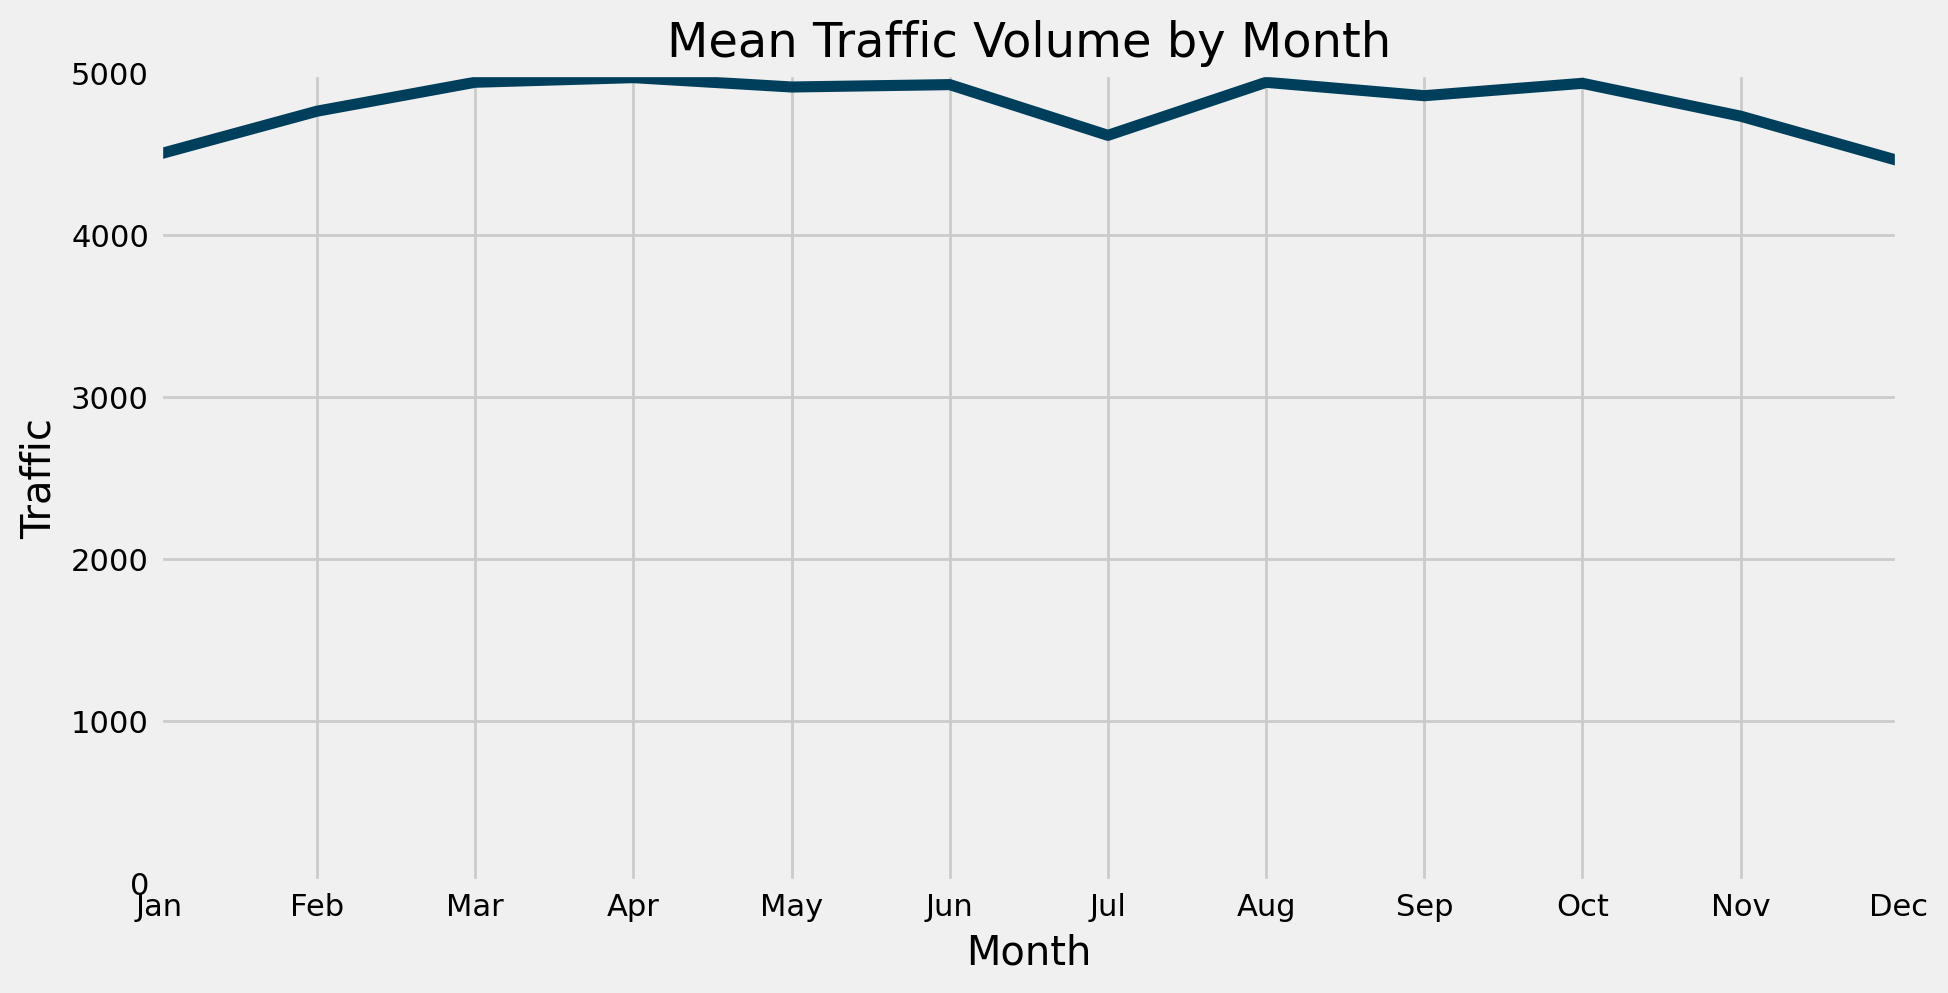

In [35]:
# Plot a line chart
by_month['traffic_volume'].plot()
plt.title('Mean Traffic Volume by Month')
plt.ylim(0,5000)
plt.ylabel('Traffic')
plt.xlim([1,12])
plt.xlabel('Month')
plt.xticks(ticks=range(1, 13),
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Exploring **day traffic volume** by `dayofweek`

In [36]:
# Check frequency of `dayofweek``
print('----- Frequency (%) of Day of the Week -----')
print(round(day_unique['dayofweek'].value_counts(normalize=True).sort_index() * 100, 2))

----- Frequency (%) of Day of the Week -----
0   14.240
1   14.010
2   14.320
3   14.300
4   14.460
5   14.300
6   14.360
Name: dayofweek, dtype: float64


The frequency of each day of the week is roughly similar.

We can calculate the mean traffic volume for each day of the week.

In [37]:
# Group by the `dayofweek``
by_dayofweek = day_unique.groupby('dayofweek').mean(numeric_only=True)

# Display traffic volume by dayofweek
print('----- Mean Traffic Volume by Day of the Week -----')
print(by_dayofweek['traffic_volume'])

----- Mean Traffic Volume by Day of the Week -----
dayofweek
0   4,923.943
1   5,221.085
2   5,316.834
3   5,329.128
4   5,307.582
5   3,983.610
6   3,496.085
Name: traffic_volume, dtype: float64


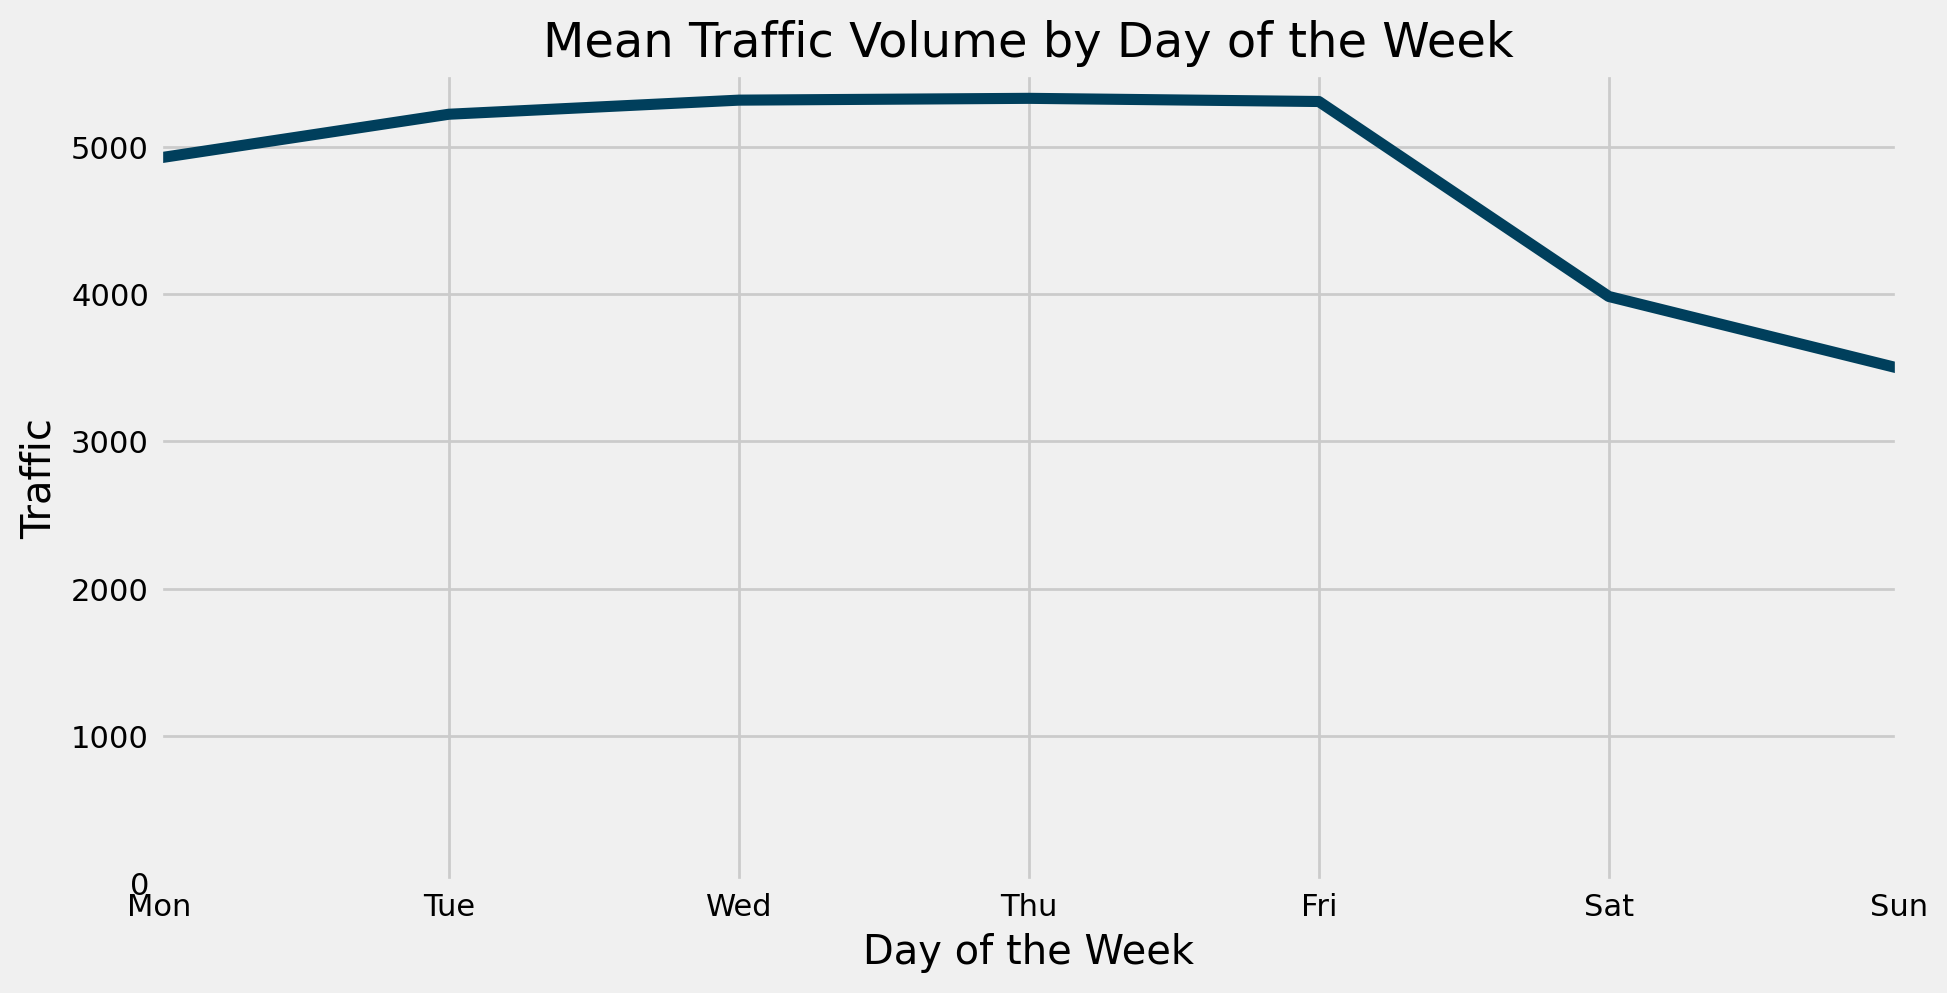

In [38]:
# Plot a line chart
by_dayofweek['traffic_volume'].plot()
plt.title('Mean Traffic Volume by Day of the Week')
plt.ylim(0,5500)
plt.ylabel('Traffic')
plt.xlim([0,6])
plt.xlabel('Day of the Week')
plt.xticks(ticks=range(0, 7), 
           labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

The mean traffic volume is higher on weekdays than on weekends (5 = Saturday, 6 = Sunday).

### Exploring **weekdays** and **weekends day traffic volume** by **hour**

Let's take a deeper look at the traffic volume by the day type: 
- _weekdays_ (Monday to Friday)
- _weekends_ (Saturday and Sunday)

In [39]:
# Create two filtered DataFrames
weekdays = day_unique[day_unique['dayofweek'] <= 4] # 4 == Friday
weekends = day_unique[day_unique['dayofweek'] >= 5] # 5 == Saturday

# Group by hour
by_hour_weekdays = weekdays.groupby('hour').mean(numeric_only=True)
by_hour_weekends = weekends.groupby('hour').mean(numeric_only=True)

# Display traffic volume group by hour for weekdays and weekends
print('----- Weekdays Traffic Volume by Hour -----')
print(by_hour_weekdays['traffic_volume'])
print()
print('----- Weekends Traffic Volume by Hour -----')
print(by_hour_weekends['traffic_volume'])

----- Weekdays Traffic Volume by Hour -----
hour
7    6,061.162
8    5,508.897
9    4,900.602
10   4,400.512
11   4,663.445
12   4,873.934
13   4,879.508
14   5,182.139
15   5,629.210
16   6,240.882
17   5,823.123
18   4,485.019
Name: traffic_volume, dtype: float64

----- Weekends Traffic Volume by Hour -----
hour
7    1,601.522
8    2,355.323
9    3,132.917
10   3,718.391
11   4,081.983
12   4,402.638
13   4,407.611
14   4,392.837
15   4,372.389
16   4,375.214
17   4,186.442
18   3,852.758
Name: traffic_volume, dtype: float64


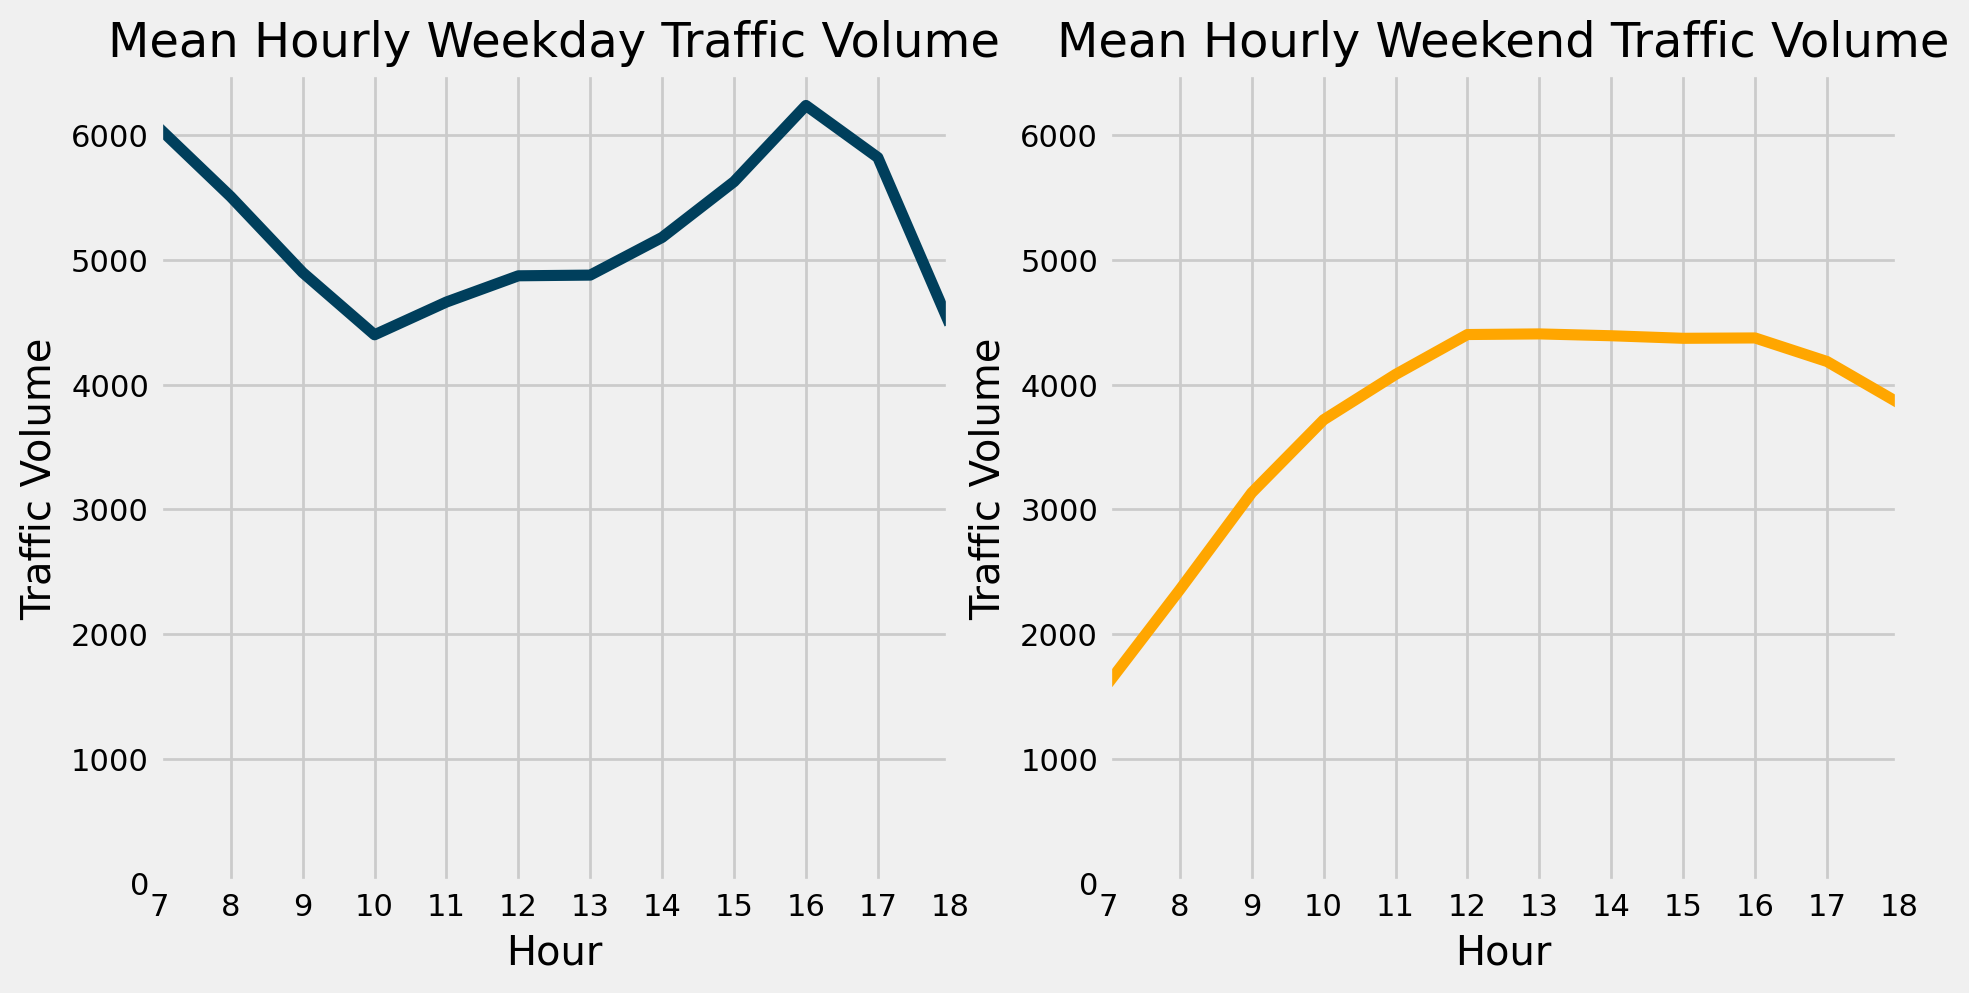

In [40]:
# Create a side-by-side plots of mean hourly weekday and weekend traffic volume
fig, axes = plt.subplots(1, 2)

# Weekday plot
axes[0].plot(by_hour_weekdays['traffic_volume'], color=custom_palette[0])
axes[0].set_title('Mean Hourly Weekday Traffic Volume')
axes[0].set_ylabel('Traffic Volume')
axes[0].set_xlabel('Hour')
axes[0].set_xticks(ticks=range(7,19))
axes[0].set_ylim(0, 6500)
axes[0].set_xlim(7, 18)

# Weekend plot
axes[1].plot(by_hour_weekends['traffic_volume'], color=custom_palette[-1])
axes[1].set_title('Mean Hourly Weekend Traffic Volume')
axes[1].set_ylabel('Traffic Volume')
axes[1].set_xlabel('Hour')
axes[1].set_xticks(ticks=range(7,19))
axes[1].set_ylim(0, 6500)
axes[1].set_xlim(7, 18)

plt.show()

**Observations**
- The traffic is usually heavier during warm months (March to October) compared to cold months (November to February).
- The traffic is usually heavier on weekdays compared to weekends.
- On weekdays, the rush hours are around 7 am and 4 pm.

### Exploring **mean day traffic volume** by **weather**

In [41]:
# Get correlation matrix for all weather columns that are numerical
corr = day[['traffic_volume', 'temp_k', 'rain_1h_mm', 'snow_1h_mm', 'clouds_all']].corr()

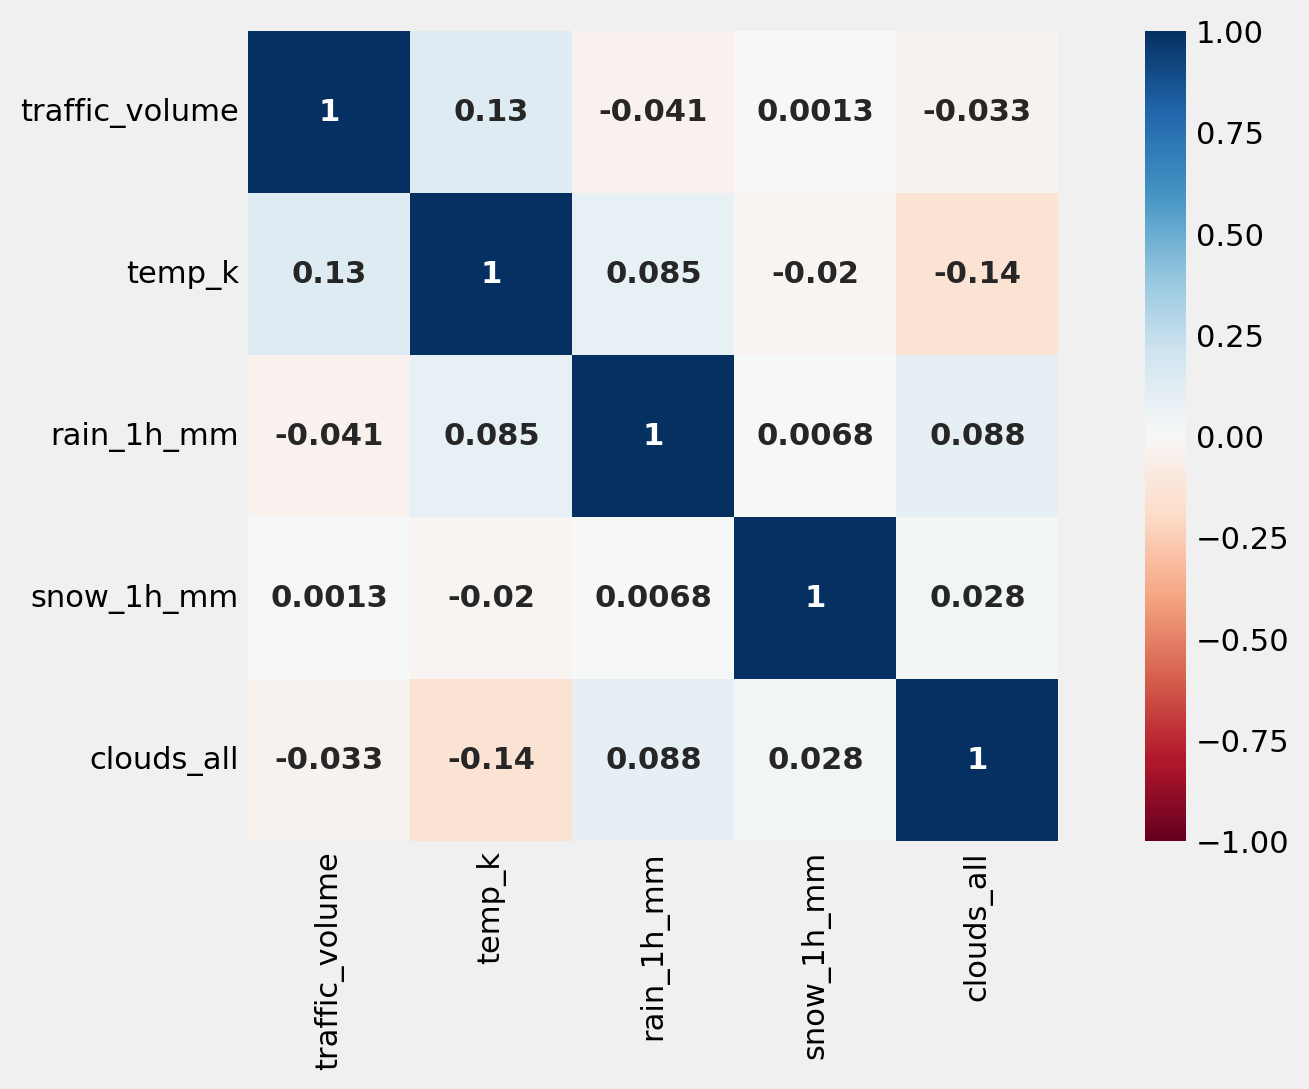

In [42]:
# Plot a heatmap showing correlation
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':11, 'fontweight':'bold'},
           square=True)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


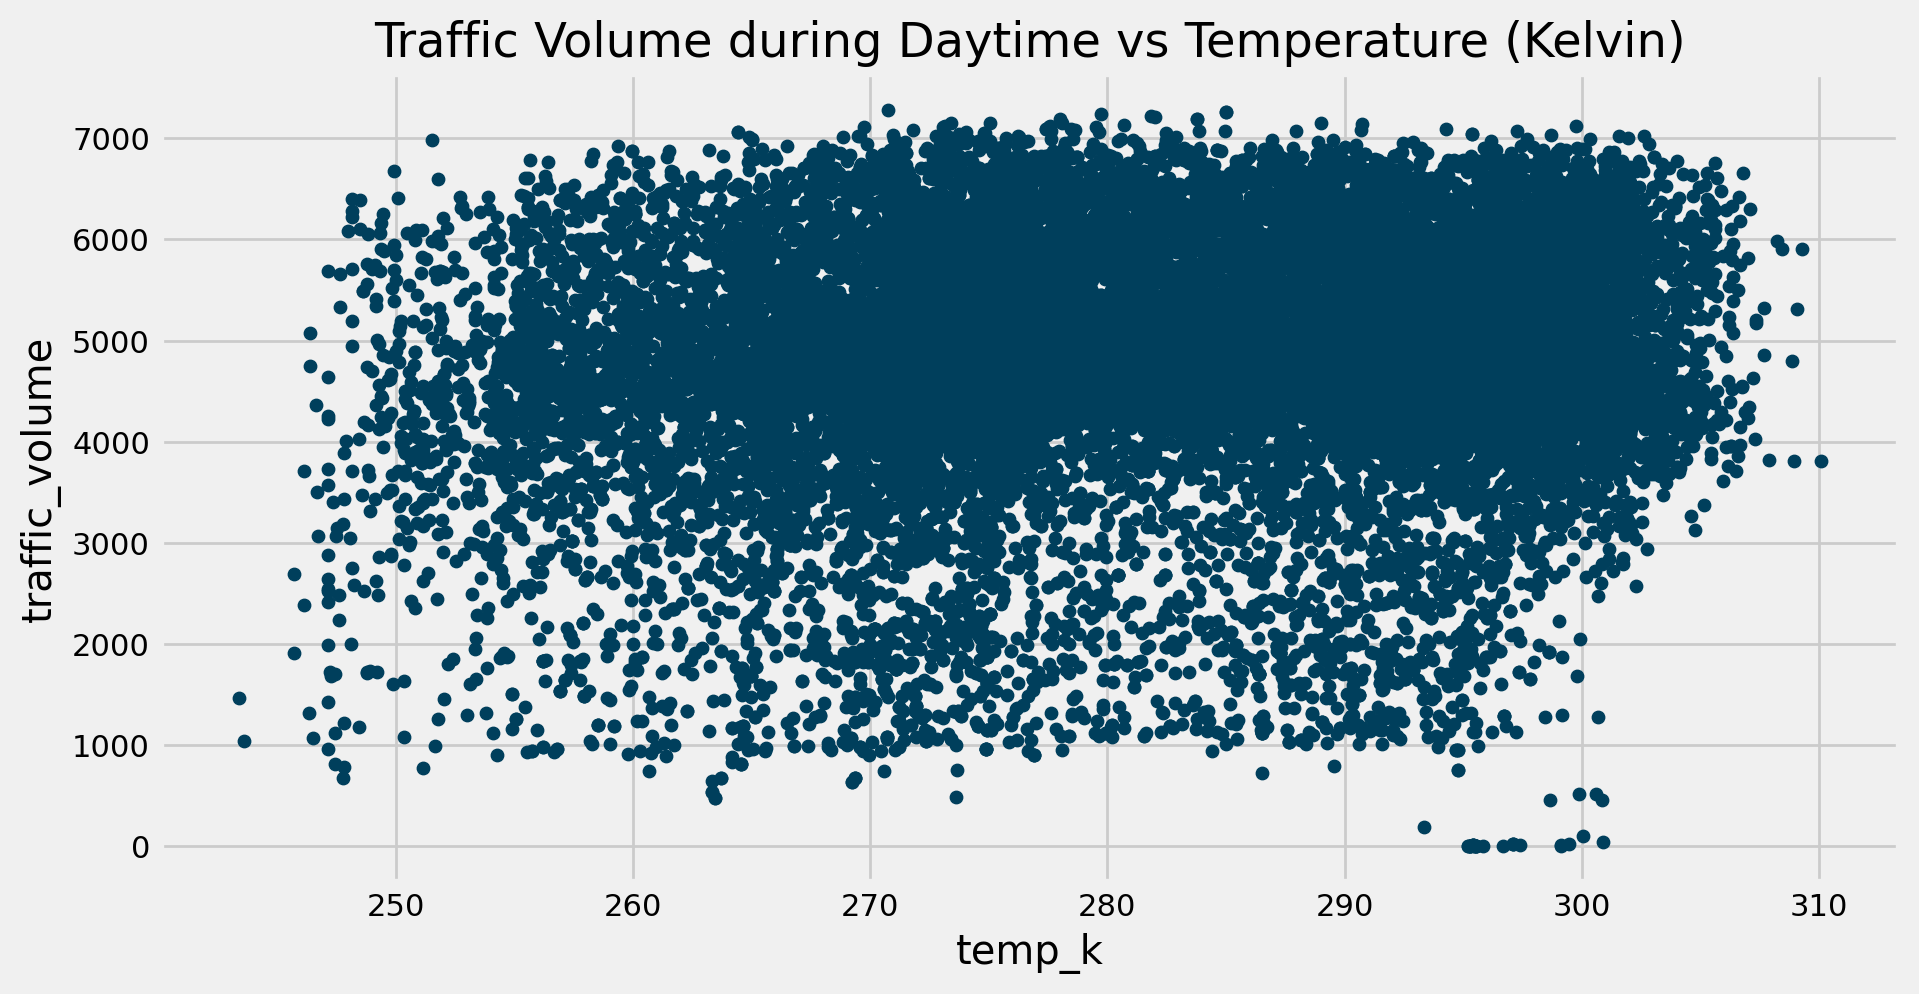

In [43]:
# Plot scatter plot of `traffic_volume` vs `temp_k`
day.plot.scatter(x='temp_k', y='traffic_volume')
plt.title('Traffic Volume during Daytime vs Temperature (Kelvin)')
plt.show()

**Observations**
- Temperature, which has the strongest correlation with `traffic_volume` among all the numeric weather columns, only has a correlation coefficient of 0.13, which is weakly correlated.
- We don't find any reliable indicator of heavy traffic.



### Exploring **mean day traffic volume** by `weather_main`

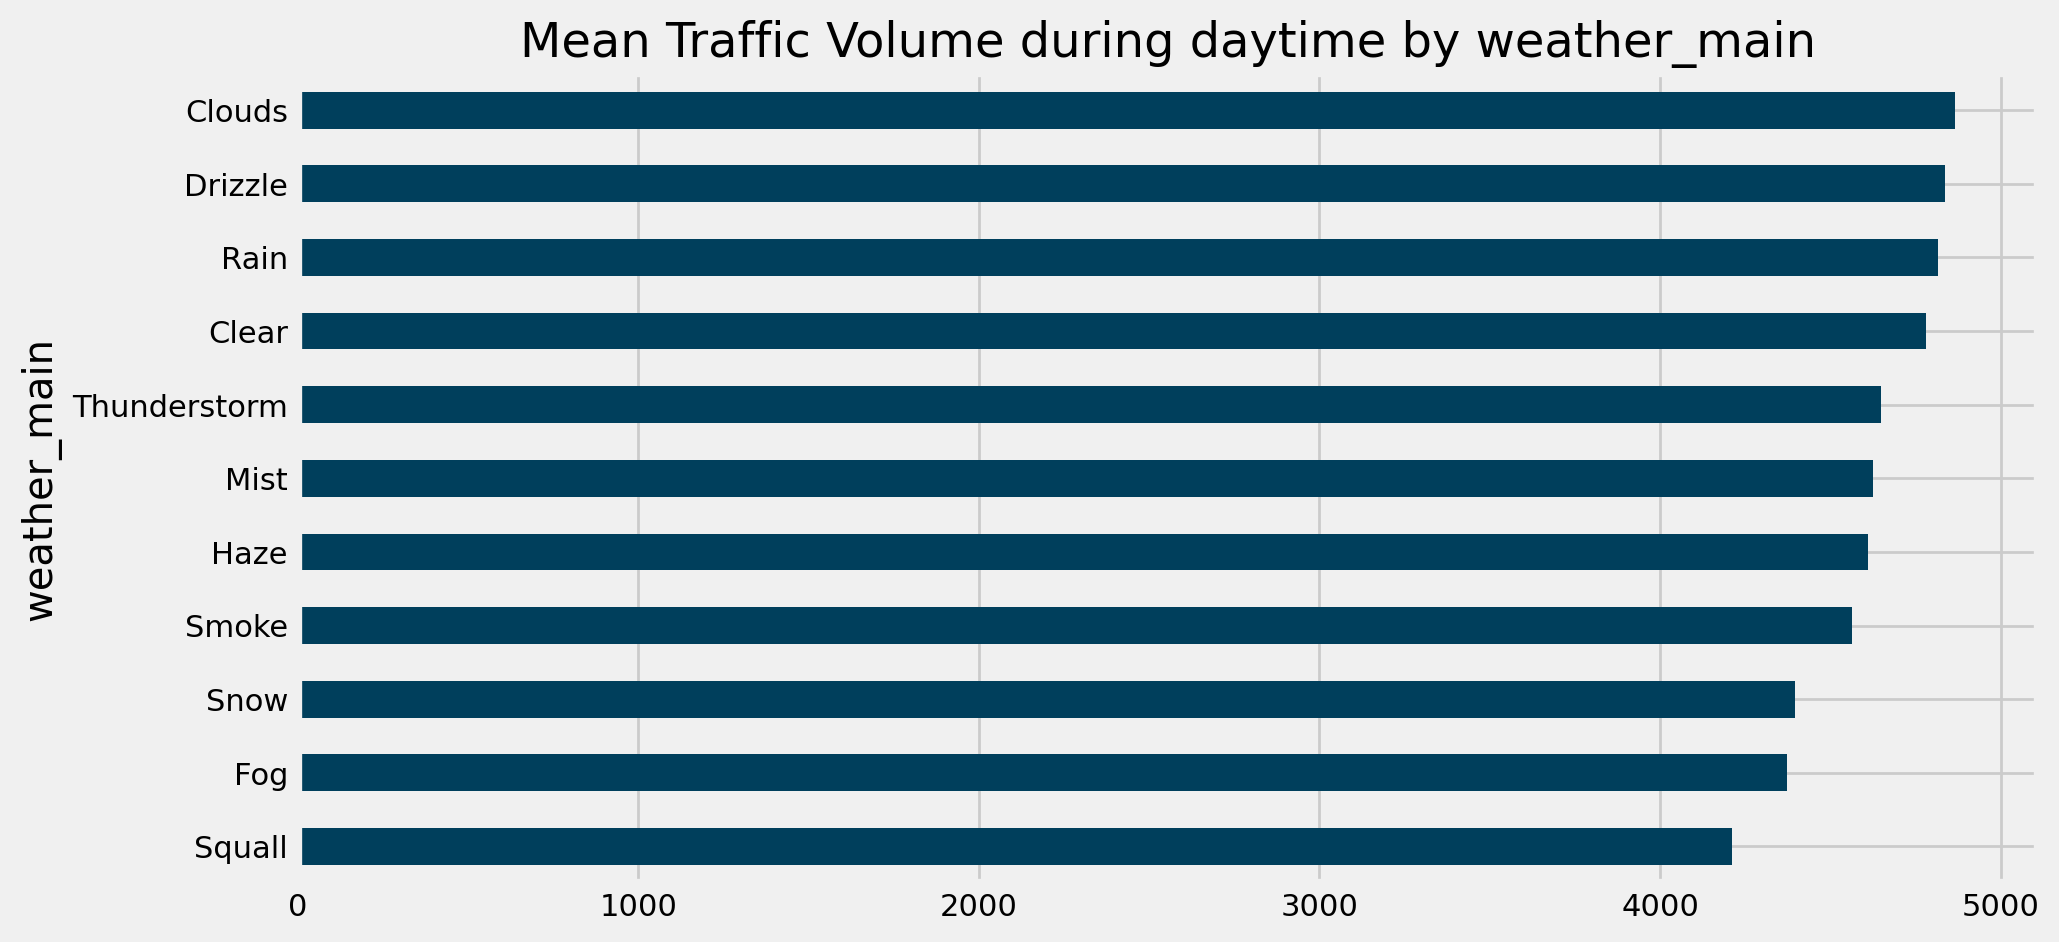

In [44]:
# Group `traffic_volume` by `weather_main`
by_weather_main = day.groupby('weather_main')['traffic_volume'].mean(numeric_only=True).sort_values()
by_weather_main.plot.barh()
plt.title('Mean Traffic Volume during daytime by weather_main')
plt.show()

**Observations**
- There are no main weather type that has a mean day traffic volume exceeding 5,000 cars.

### Exploring **mean day traffic volume** by `weather_description`

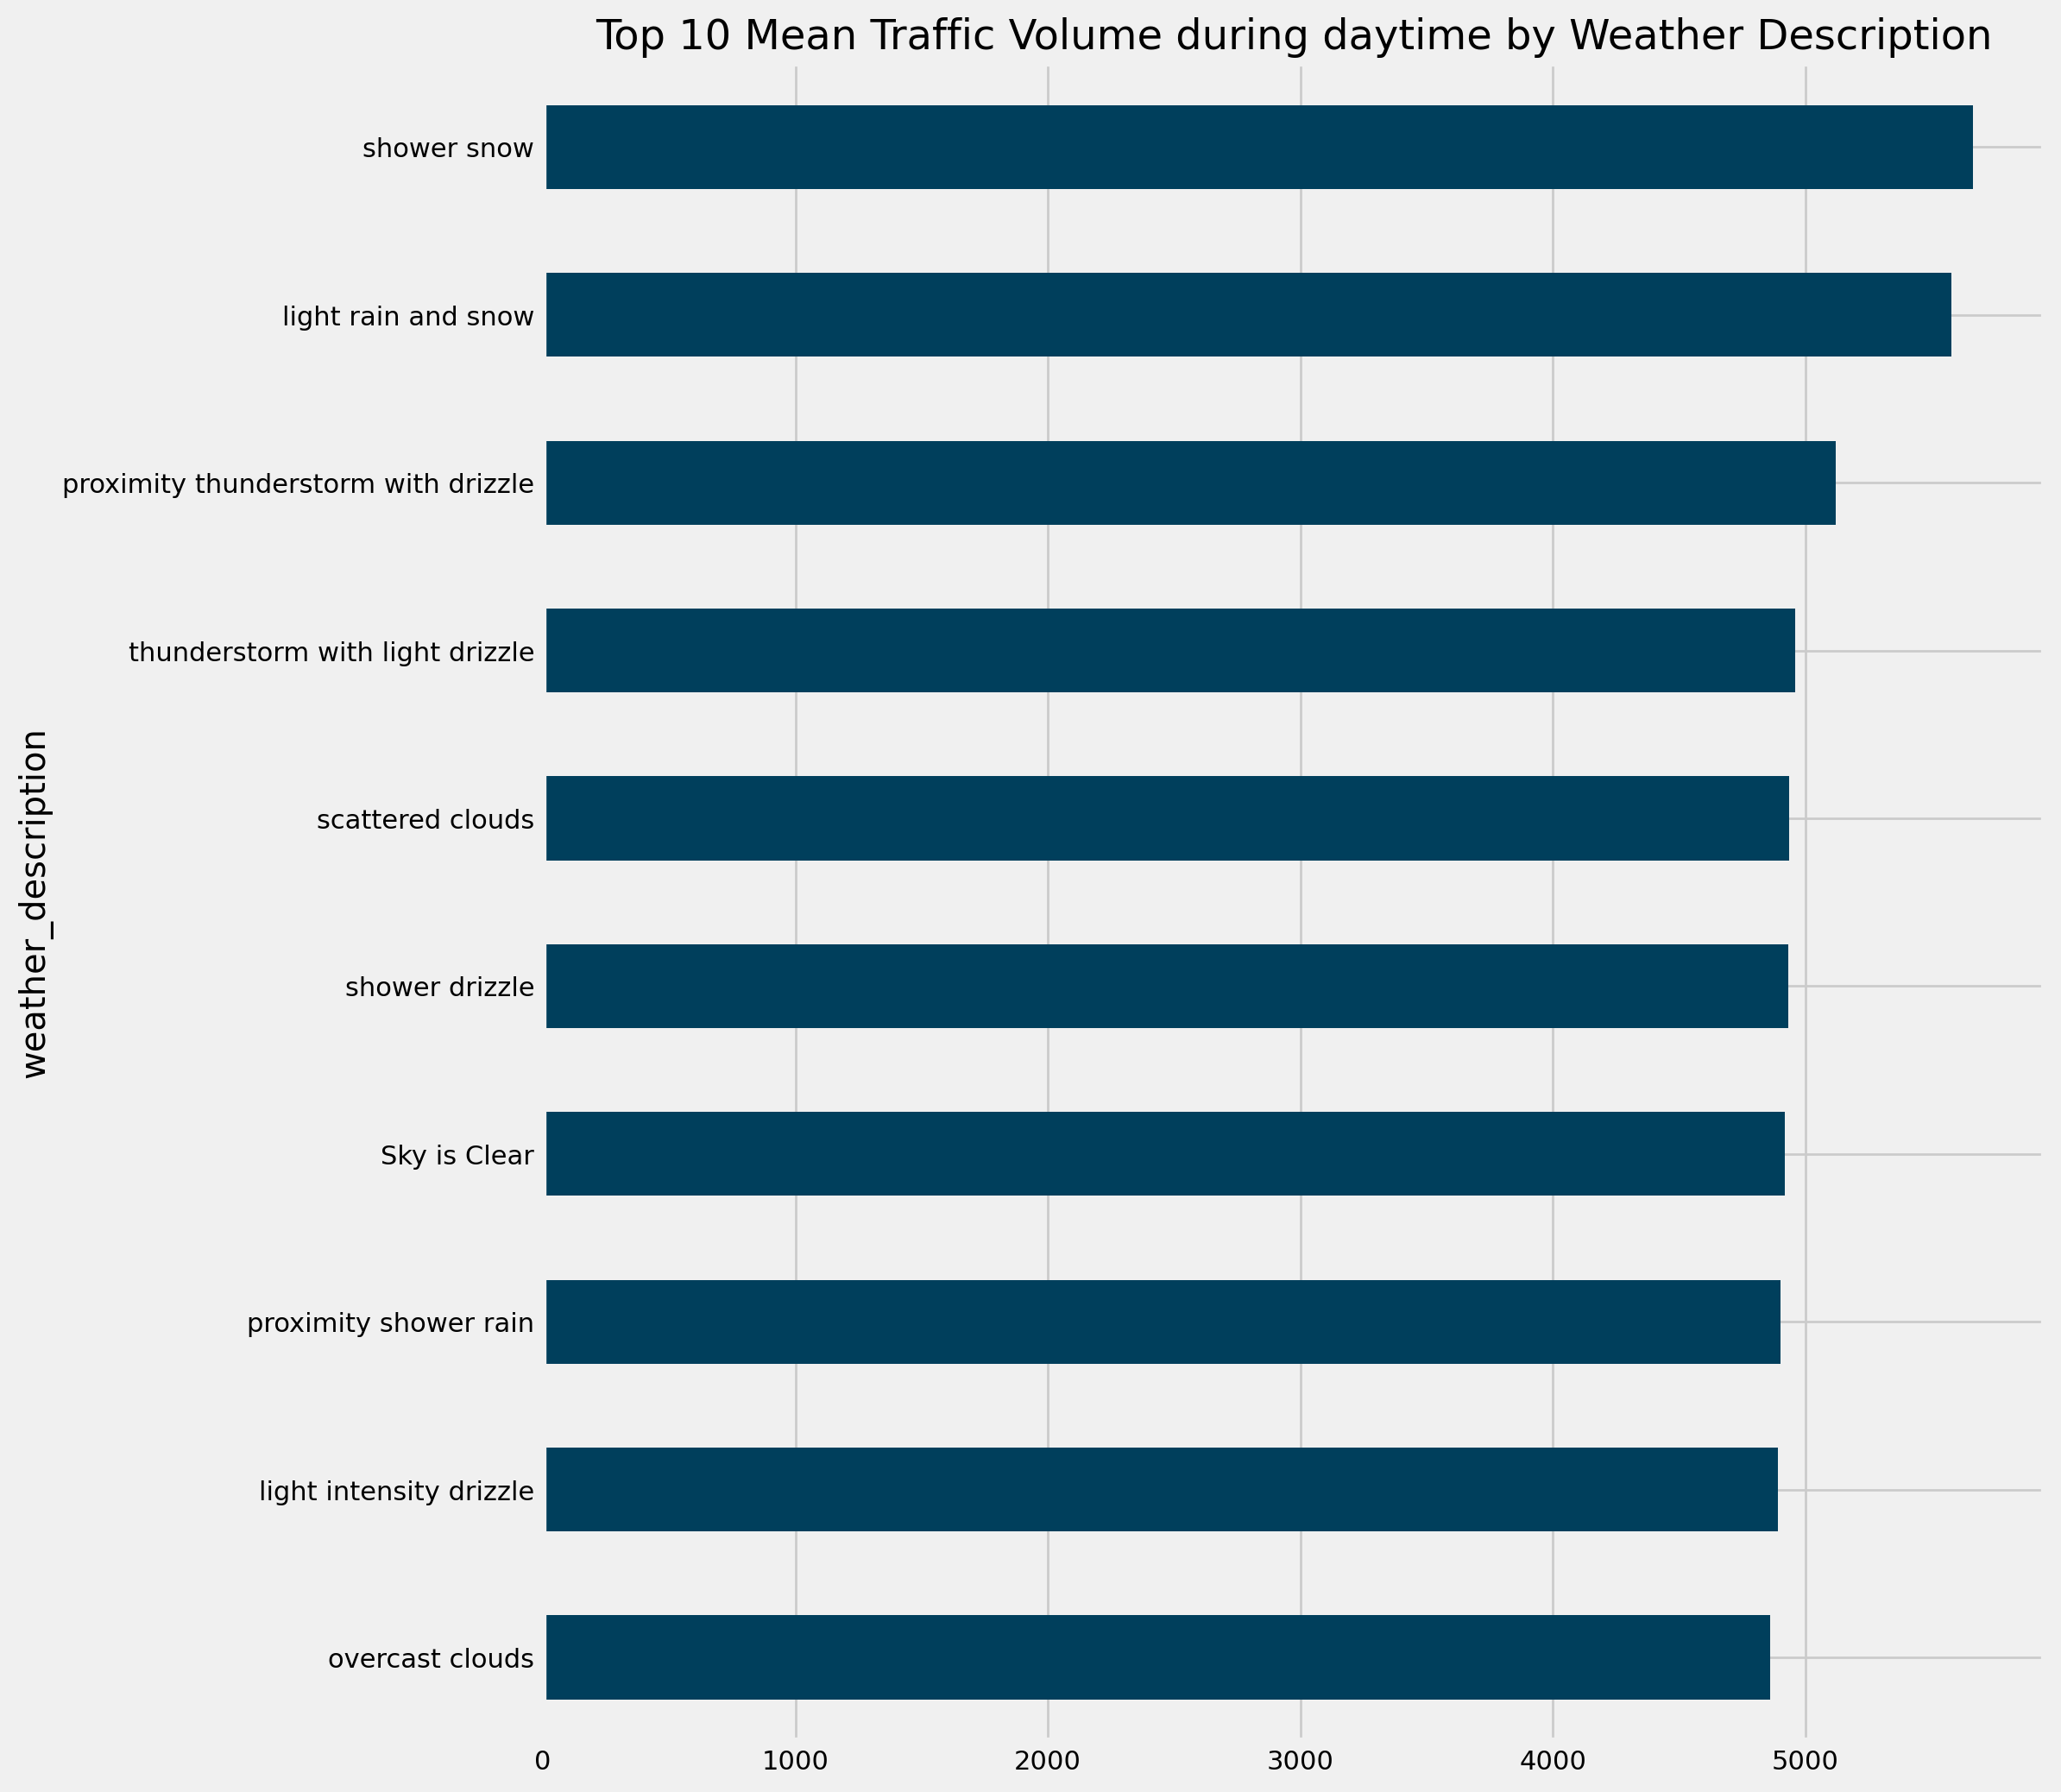

In [45]:
# Group `traffic_volume` by `weather_description`
by_weather_description = day.groupby('weather_description')['traffic_volume'].mean(numeric_only=True).sort_values()
plt.figure(figsize=(10, 12))
by_weather_description[-10:].plot.barh()
plt.title('Top 10 Mean Traffic Volume during daytime by Weather Description')
plt.show()

**Observations**
- There are 3 weather descriptions that have a mean day traffic volume exceeding 5,000 cars:
    1. shower snow
    2. light rain and snow
    3. proximity thunderstorm with drizzle

---

# 5

## Conclusion

### Insights 

**Time Indicators**
- The traffic is usually heavier during warm months (March to October) compared to cold months (November to February).
- The traffic is usually heavier on weekdays compared to weekends.
- On weekdays, the rush hours are around 7 am and 4 pm.

<p>&nbsp;</p>

**Weather Indicators**
- These weather conditions are indicators of heavy traffic:
    1. shower snow
    2. light rain and snow
    3. proximity thunderstorm with drizzle

### Suggestions

- The authorities can look into measure to ensure smooth traffic and maintain traffic safety during the day as a result of high traffic volume and poor weather conditions: 

    1. shower snow
    2. light rain and snow
    3. proximity thunderstorm with drizzle

### Possible Next Steps
Areas to expand on:
- So far we have only considered the traffic volume during the daytime as the overall traffic volume is higher. However there are some periods of the night where there are more than 5,000 cars, which is worth exploring.
- Gather accidents data in that area for further analysis to see if higher traffic correlates to more accidents.

---

# 6

## Epilogue

### References
[<span id="fn1">1.</span>](#fn1-back) _Kelvin to celsius conversion (no date)._ Kelvin to Celsius conversion (K to °C). Available at: https://www.rapidtables.com/convert/temperature/kelvin-to-celsius.html (Accessed: February 26, 2023). 

[<span id="fn2">2.</span>](#fn2-back) _World: Greatest Sixty-Minute (One Hour) Rainfall (no date)._ World Meteorological Organization's World Weather & Climate Extremes Archives. Available at: https://wmo.asu.edu/content/world-greatest-sixty-minute-one-hour-rainfall (Accessed: February 26, 2023). 

### Versioning
Notebook and insights by Joshua Nketsiah
- Version: 1.0.0
- Date: 2023-04-26